In [9]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [10]:
max_features = 20000
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

max_len = 150
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [11]:
model_layers_dict = {}
for mask_flag in [True, False]:
    model_layers_dict[mask_flag] = [
        Embedding(max_features, 8, mask_zero=mask_flag),
        SimpleRNN(16, input_shape=(max_features,max_len), kernel_regularizer='l2'),
        Dropout(0.1),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

2022-12-05 09:09:19.377229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-05 09:09:19.377383: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 09:09:19.377535: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-12-05 09:09:19.378869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


True
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 8)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,417
Trainable params: 160,417
Non-trainable params: 0
_________________________________________________________________
False
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Emb

In [12]:
history_dict = {}
for k, model in tqdm(models.items()):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 295s 364ms/step - loss: 0.7171 - accuracy: 0.5646 - val_loss: 0.6346 - val_accuracy: 0.7373
Epoch 2/5
782/782 [==============================] - 264s 337ms/step - loss: 0.5508 - accuracy: 0.7493 - val_loss: 0.5094 - val_accuracy: 0.7806
Epoch 3/5
782/782 [==============================] - 278s 356ms/step - loss: 0.3651 - accuracy: 0.8607 - val_loss: 0.3714 - val_accuracy: 0.8478
Epoch 4/5
782/782 [==============================] - 2664s 3s/step - loss: 0.2554 - accuracy: 0.9124 - val_loss: 0.3706 - val_accuracy: 0.8518
Epoch 5/5
782/782 [==============================] - 27s 34ms/step - loss: 0.1877 - accuracy: 0.9414 - val_loss: 0.3923 - val_accuracy: 0.8444


 50%|█████     | 1/2 [58:48<58:48, 3528.95s/it]

Epoch 1/5
782/782 [==============================] - 19s 24ms/step - loss: 0.7152 - accuracy: 0.5500 - val_loss: 0.6710 - val_accuracy: 0.6168
Epoch 2/5
782/782 [==============================] - 18s 22ms/step - loss: 0.5321 - accuracy: 0.7582 - val_loss: 0.5549 - val_accuracy: 0.7344
Epoch 3/5
782/782 [==============================] - 18s 23ms/step - loss: 0.3363 - accuracy: 0.8707 - val_loss: 0.4105 - val_accuracy: 0.8293
Epoch 4/5
782/782 [==============================] - 18s 24ms/step - loss: 0.2268 - accuracy: 0.9227 - val_loss: 0.4260 - val_accuracy: 0.8328
Epoch 5/5
782/782 [==============================] - 19s 24ms/step - loss: 0.1631 - accuracy: 0.9486 - val_loss: 0.4793 - val_accuracy: 0.8202


100%|██████████| 2/2 [1:00:21<00:00, 1810.62s/it]


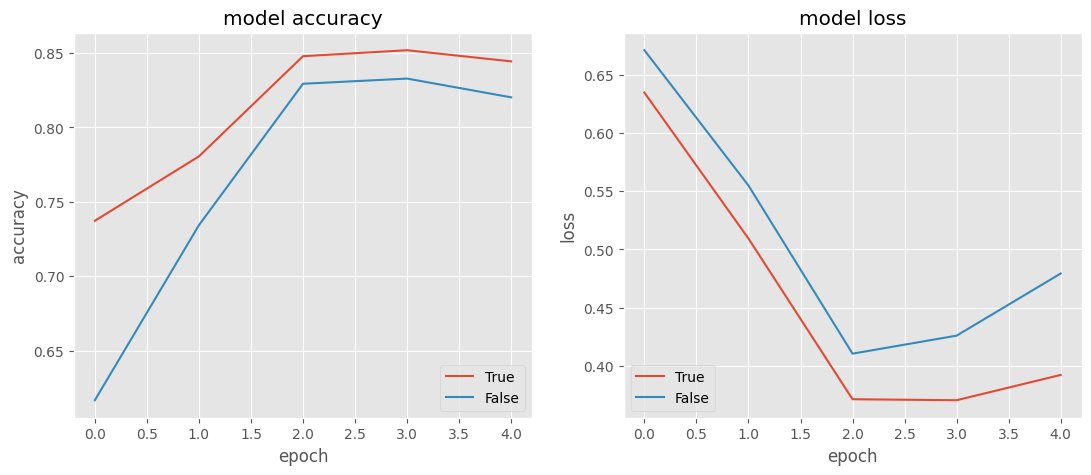

In [13]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');